# Article 9
Une version courte pour moi même en multiple notebooks

1. **Version originale de l'article 9 (VO)**  
    * L'Article 9 (VO)
    * Les statistique de l'article 9 (VO)
    
2. **Versions complémentaires de l'article 9**
    
    * Les versions (Versions)
    
    * Les statistiques de participations de versions

3. **Comparaison des versions (VO vs Versions)**
    
    * Version originale
    
    * Versions complémentaires
    
    * Ajout de la version orginale aux versions

4. **Participants**

    * Ensemble des participants
    
    * Electeurs de l'article 9

5. **Votes**
    * Les types de votes



In [30]:
#import des modules

#lecture des json
import json 

#affichage des valeurs identées
import pprint
pp = pprint.PrettyPrinter(indent=4, )

#affichage des graphs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


## Version originale de l'article 9
#### L'article 9 VO

Le fichier article9.json contient toutes les informations relatives à l'article 9 du PJL sur le numérique

In [31]:
#chargement de l'article 9
with open("article9.json", "r") as f:
    article9 = json.load(f)

On va stocker le détail des **participations** de l'article 9 dans **ref_article9**
de la manière suivante:

In [32]:
ref_article9 = {
                "date": article9["created_at"],
                "slug": article9["article_link"].split("/")[-1],
                "title": article9["article_link"].split("/")[-1].replace("-", " "),
                "text": article9['body'],
                "author": article9["author"],
                "votes":[], 
                "arguments":article9["arguments"], 
                "sources":article9["sources"],
                "versions":article9["versions"]
               }
#print ref_article9

#### Stats de V0
Maintenant on va stocker les statistiques de l'article9 dans **stat_article9**

In [33]:
stats_article9 = {"votes":{}, "arguments": {}, "versions":{}, "sources":{}, "total":{}}
for k,v in article9.items():
    if k.startswith("votes_"):
        #un petit raccourci
        les_votes = stats_article9["votes"]
        if k == "votes_nok":
            les_votes["contre"] = v
        elif k == "votes_ok":
            les_votes["pour"] = v
        elif k == "votes_mitige":
            les_votes["neutre"] = v
        else:
            les_votes["total"] = v
            stats_article9["total"]["votes"] = v
    elif k.startswith("arguments_"):
        #un petit raccourci
        les_arguments = stats_article9["arguments"]
        if k == "arguments_yes_count":
            les_arguments["pour"] = v
        elif k == "arguments_no_count":
            les_arguments["contre"] = v
        else:
            les_arguments["total"] = v
            stats_article9["total"]["arguments"] = v


    elif k.startswith("sources_"):
        #un petit raccourci
        les_sources = stats_article9["sources"]
        les_sources["total"] = v
        #on a pas encore les détails des votes sur les sources
        #on l'instancie à 0 pour retrouver ça plus tard dans les votes
        les_sources["pour"] = 0
        stats_article9["total"]["sources"] = v
    elif k.startswith("versions_"):
        stats_article9["versions"] = {"total":v}
        stats_article9["total"]["versions"] = v
pp.pprint(stats_article9)

{   'arguments': {   'total': 132},
    'sources': {   'pour': 0, 'total': 22},
    'total': {   'arguments': 132, 'sources': 22, 'versions': 108, 'votes': 3334},
    'versions': {   'total': 108},
    'votes': {   'contre': 1732, 'neutre': 282, 'pour': 1320, 'total': 3334}}


#### Apercu de la version originale de l'article 9
* Les participations:

{'sources': 22, 'votes': 3334, 'arguments': 132, 'versions': 108}


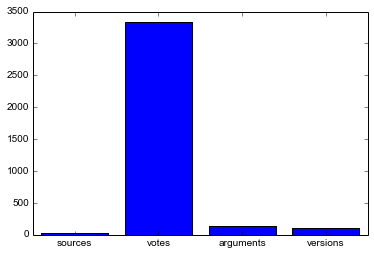

In [34]:
plt.bar(range(len(stats_article9["total"])), stats_article9["total"].values(), align='center')
plt.xticks(range(len(stats_article9["total"])), stats_article9["total"].keys())
print stats_article9["total"]
plt.show()

* La répartition des votes comptabilisés

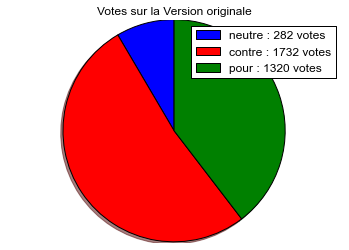

In [35]:
from collections import OrderedDict
votes_vo = OrderedDict({k:v for k,v in stats_article9["votes"].items() if k != "total"})
colors = ["blue", "red", "green"]
legend = [" ".join([k,":",str(v),"votes"]) for k, v in votes_vo.items()]
plt.pie(votes_vo.values(), colors=colors,shadow=True, startangle=90)
plt.legend(legend)
plt.title("Votes sur la Version originale")
plt.axis('equal')
plt.show()

## Versions complémentaires de l'article 9
L'article 9 a donc eu 108 versions complémentaires soumises elles aussi aux votes et aux arguments

#### Les 108 versions complémentaires


In [36]:
versions = {}
for version in ref_article9["versions"]:
    versions[version["slug"]] = {"author": version["author"],
                                 "title": version['title'],
                                 "text":version["after"], 
                                 "arguments":[], 
                                 "votes": [], 
                                 "sources":[],
                                 "date": version["created_at"]
                                }

#### Les statistiques des versions complémentaires


In [37]:
stats_versions = {}
for version in ref_article9["versions"]:
    stats_versions[version["slug"]] = {"arguments":{"pour":0, "contre":0, "neutre":0, "total":0}, 
                                        "votes":{"pour":0, "contre":0, "neutre":0, "total":0}, 
                                       "sources":{"total": 0, "pour":0}, 
                                       "total": {"votes":0, "arguments":0, "sources":0}
                                      }
    #print pp.pprint(sorted(version.keys()))
    for k, v in version.items():
        if k.startswith("arguments"):
            if "_yes" in k:
                stats_versions[version["slug"]]["arguments"]["pour"] = v
            elif "_no" in k:
                stats_versions[version["slug"]]["arguments"]["contre"] = v
            else:
                stats_versions[version["slug"]]["arguments"]["total"] = v
                stats_versions[version["slug"]]["total"]["arguments"] = v
        elif k.startswith("votes"):
            if "total" in k:
                stats_versions[version["slug"]]["votes"]["total"] = v
                stats_versions[version["slug"]]["total"]["votes"] = v
            elif "nok" in k:
                stats_versions[version["slug"]]["votes"]["contre"] = v
            else:
                stats_versions[version["slug"]]["votes"]["neutre"] = v
                #manque votes_ok
        else:
            pass
    
pp.pprint(stats_versions.items()[1])

(   u'ne-pas-oublier-les-sets-de-donnees-lies-a-un-article',
    {   'arguments': {   'contre': 4, 'neutre': 0, 'pour': 3, 'total': 7},
        'sources': {   'pour': 0, 'total': 0},
        'total': {   'arguments': 7, 'sources': 0, 'votes': 87},
        'votes': {   'contre': 2, 'neutre': 6, 'pour': 0, 'total': 87}})


In [38]:
#Les stats de votes pour sont toujours à 0 et manquantes: correction
for v in stats_versions.values():
    v["votes"]["pour"] = v["votes"]["total"] - (v["votes"]["neutre"]+v["votes"]["contre"])
    
pp.pprint(stats_versions.items()[1])

(   u'ne-pas-oublier-les-sets-de-donnees-lies-a-un-article',
    {   'arguments': {   'contre': 4, 'neutre': 0, 'pour': 3, 'total': 7},
        'sources': {   'pour': 0, 'total': 0},
        'total': {   'arguments': 7, 'sources': 0, 'votes': 87},
        'votes': {   'contre': 2, 'neutre': 6, 'pour': 79, 'total': 87}})


## Comparaison des versions

### Version originale
* pour rappel les participations de la version originale


In [39]:
print stats_article9["total"]


{'sources': 22, 'votes': 3334, 'arguments': 132, 'versions': 108}


* pour rappel les repartitions des votes

In [40]:
print votes_vo

OrderedDict([('neutre', 282), ('contre', 1732), ('pour', 1320)])


### Versions supplémentaires
* les votes par version



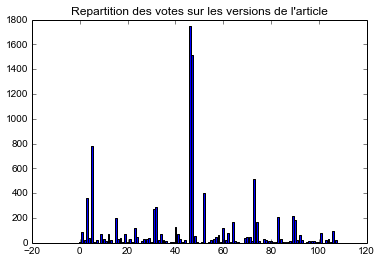

In [41]:
votes_versions = []
for k,v in stats_versions.items():
    votes_versions.append(v["total"]["votes"])

plt.bar(range(len(votes_versions)), votes_versions, align='center')
#plt.xticks(range(len(votes_versions)), [str(x) for x in range(len(votes_versions))])
plt.title("Repartition des votes sur les versions de l'article")
plt.show()


In [42]:
#nombre de votes au total pour les autres versions
print "Pour un total de :"
print sum(votes_versions), "votes"

Pour un total de :
9517 votes


* les arguments par version


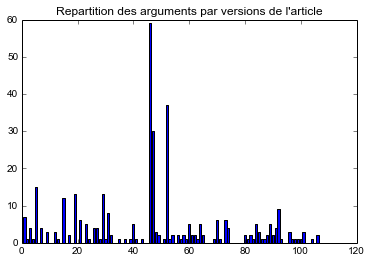

In [43]:
args_versions = []
for k,v in stats_versions.items():
    args_versions.append(v["total"]["arguments"])

plt.bar(range(len(args_versions)), args_versions, align='center')
#plt.xticks(range(len(votes_versions)), [str(x) for x in range(len(votes_versions))])
plt.title("Repartition des arguments par versions de l'article")
plt.show()

In [44]:
#nombre d'arguments au total pour les autres versions
print "Pour un total de :"
print sum(args_versions), "arguments"

Pour un total de :
349 arguments


* les stats de participations compilées des différentes versions


In [45]:
stats_versions["total"] = {"arguments":sum(args_versions), "votes": sum(votes_versions), "sources": 0}

{'sources': 0, 'votes': 9517, 'arguments': 349}


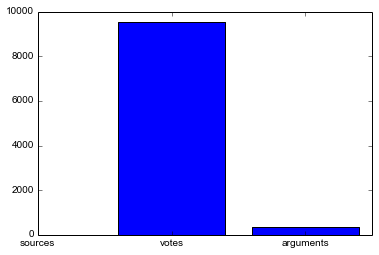

In [46]:
plt.bar(range(len(stats_versions["total"])), stats_versions["total"].values(), align='center')
plt.xticks(range(len(stats_versions["total"])), stats_versions["total"].keys())
print stats_versions["total"]
plt.show()

In [47]:
#on ajoute de la meme manière que pour stats_article9 les versions compilées
#print stats_versions.keys()
#dans un autre dictionnaire pour ne pas melanger les stats par versions


stats_versions_total = {"arguments":{"total": [], "pour": [], "contre":[]}, 
                        "votes":{"total": sum(votes_versions), "pour": [], "contre":[], "neutre":[]}, 
                        "sources":{"total":0, "pour": 0}, 
                        "total":{"votes":sum(votes_versions), "arguments":sum(args_versions), "sources": 0}}


for k, v in stats_versions.items():
    if k == "arguments":
        del k
    elif k == "votes":
        del k
    elif k == "total":
        del k
    elif k == "sources":
        del k
    else:
        try:
            stats_versions_total["votes"]["pour"].append(v["votes"]["pour"])
            stats_versions_total["votes"]["contre"].append(v["votes"]["contre"])
            stats_versions_total["votes"]["neutre"].append(v["votes"]["neutre"])
            stats_versions_total["arguments"]["total"].append(v["arguments"]["total"])
            stats_versions_total["arguments"]["pour"].append(v["arguments"]["pour"])
            stats_versions_total["arguments"]["contre"].append(v["arguments"]["contre"])
        except KeyError:
            print k
    
#et on somme
stats_versions_total["votes"]["contre"] = sum(stats_versions_total["votes"]["contre"])
stats_versions_total["votes"]["pour"] = sum(stats_versions_total["votes"]["pour"])
stats_versions_total["votes"]["neutre"] = sum(stats_versions_total["votes"]["neutre"])
stats_versions_total["arguments"]["total"]= sum(stats_versions_total["arguments"]["total"])
stats_versions_total["arguments"]["pour"]= sum(stats_versions_total["arguments"]["pour"])
stats_versions_total["arguments"]["contre"]= sum(stats_versions_total["arguments"]["contre"])
pp.pprint(stats_versions_total)


{   'arguments': {   'contre': 149, 'pour': 200, 'total': 349},
    'sources': {   'pour': 0, 'total': 0},
    'total': {   'arguments': 349, 'sources': 0, 'votes': 9517},
    'votes': {   'contre': 1693, 'neutre': 218, 'pour': 7606, 'total': 9517}}


* répartition des votes pour les versions


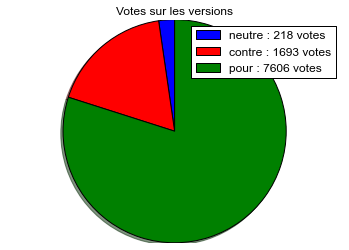

In [48]:
votes_versions = OrderedDict({k:v for k,v in stats_versions_total["votes"].items() if k != "total"})
colors = ["blue", "red", "green"]
legend = [" ".join([k,":",str(v),"votes"]) for k, v in votes_versions.items()]
plt.pie(votes_versions.values(), colors=colors,shadow=True, startangle=90)
plt.title("Votes sur les versions")
plt.legend(legend)
plt.axis('equal')
plt.show()

* repartition des votes sur les arguments pour les versions

OrderedDict([('contre', 149), ('pour', 200)])


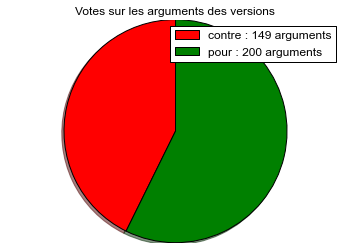

In [49]:
args_versions = OrderedDict({k:v for k,v in stats_versions_total["arguments"].items() if k != "total"})
print args_versions
colors = ["red", "green"]
legend = [" ".join([k,":",str(v),"arguments"]) for k, v in args_versions.items()]
plt.pie(args_versions.values(), colors=colors,shadow=True, startangle=90)
plt.title("Votes sur les arguments des versions")
plt.legend(legend)
plt.axis('equal')
plt.show()

## Ajout de la version orginale aux versions

* Ajout de la version originale dans le referentiel des versions

In [50]:
versions[ref_article9["slug"]] = ref_article9

* Ajout des stats de  votes de la version original aux stats de votes dans les stats_versions_total

In [51]:
#On ajoute le total des votes pour l'article 9 aux stats de versions
stats_versions_total["total"]["votes"] += stats_article9["total"]["votes"]
#De même pour la répartition
stats_versions_total["votes"]["pour"] += stats_article9["votes"]["pour"]
stats_versions_total["votes"]["contre"] += stats_article9["votes"]["contre"]
stats_versions_total["votes"]["neutre"] += stats_article9["votes"]["neutre"]

print stats_versions_total["votes"]

{'neutre': 500, 'total': 9517, 'contre': 3425, 'pour': 8926}


* repartition des votes au total:

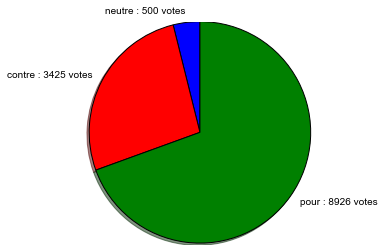

In [52]:
votes_versions = OrderedDict({k:v for k,v in stats_versions_total["votes"].items() if k != "total"})
colors = ["blue", "red", "green"]
#plt.title("Votes sur les 109 versions")
legend = [" ".join([k,":",str(v),"votes"]) for k, v in votes_versions.items()]
plt.pie(votes_versions.values(), labels=legend, colors=colors,shadow=True, startangle=90)
plt.axis('equal')

plt.show()

* Ajout des stats d'arguments de la version original aux stats d'arguments dans les stats_versions_total

La difficulté ici réside dans le fait que dans l'article original 
le nombre d'arguments recensé est de 132
et le total des votes n'est pas encore mentionné
tandis que dans les versions les arguments désigne les votes sur les arguments
le total des votes est de 349 tandis que le nombre de votes est manquant
mais qu'on peut supposer qu'un vote = 1 argument

In [53]:
#On ajoute le total des arguments pour l'article 9 aux stats de versions
#pour rappel
#les arguments de la VO
#copy ne marche pas si on le relance
nb = stats_article9["arguments"]["total"]
stats_article9["arguments"]= {"pour": None, "contre":None, "total":None, "nb": nb}

print "Arguments dans VO", stats_article9["arguments"]

stats_versions_total["arguments"]["nb"] = None
print "Arguments des versions:", stats_versions_total["arguments"]




Arguments dans VO {'nb': 132, 'total': None, 'contre': None, 'pour': None}
Arguments des versions: {'nb': None, 'total': 349, 'contre': 149, 'pour': 200}


* Ajout des votes sur les arguments de la V0

Le nombre de votes pour les 132 arguments de la VO 
doivent etre disponible dans ```ref_article9["arguments"]```

In [54]:
#dictionnaire des votes sur les arguments
votes_args_article9 = {}

for arg in ref_article9["arguments"]:
    votes_args_article9[arg["id"]] = int(arg["votes_count"])
stats_article9["arguments"]["total"] =  sum([v for v in args_article9.values()])
#nb d'arguments, nb de votes, votes_pour, votes_contre
print "Votes sur les arguments de la VO"
print stats_article9["arguments"]
print "Votes sur les arguments des VC"
print stats_versions_total["arguments"]
#On a juste besoin du nombre total de votes sur les arguments dans les versions_stats_total
#puisque le reste des repartitions n'est que partiel

stats_versions_total["arguments"]["total"] =  stats_article9["arguments"]["total"] +stats_versions_total["arguments"]["total"]
print "Votes totaux"
stats_versions_total

NameError: name 'args_article9' is not defined

* Ajout des votes sur les sources de la V0


In [ ]:
print stats_article9["sources"]

Le nombre de votes pour les 22 sources de la VO doivent etre disponible dans ```ref_article9["sources"]```

In [ ]:
votes_sources_article9 = {}
for n in ref_article9["sources"]:
    votes_sources_article9[n["id"]] = int(n["votes_count"])
print len(votes_sources_article9.keys()),"sources ont généré", sum(votes_sources_article9.values()),"votes"

stats_article9["sources"]["pour"] = sum(votes_sources_article9.values())
stats_article9["sources"]["nb"] = stats_article9["sources"]["total"]
stats_article9["sources"]["total"] =  sum(votes_sources_article9.values())
print stats_article9["sources"]
stats_versions_total["sources"] =  stats_article9["sources"]

! On a donc légèrement changé la nomenclature des stats
arguments["nb"] correspond au nb d'arguments tandis que le total correspond au nb de votes sur les arguments
sources["nb"] correspond au nb de sources tandis que le total correspond au nb de votes sur les sources

On va mettre à jour les totaux pur qu'ils correspondent aux nombre de votes sur les articles(votes) les sources ou les arguments

In [ ]:
print stats_versions_total["total"]

In [ ]:
stats_versions_total["total"]["sources"] = stats_versions_total["sources"]["total"]
stats_versions_total["total"]["arguments"] = stats_versions_total["arguments"]["total"]
print stats_versions_total["total"]

## Electeurs

### participants = electeur

In [55]:
#On charge le fichiers participants qui contient toutes les actions de chaque participant
#Ici on ne s'intéresse qu'aux votes
#qui sont détaillés par participants
with open("participants.json", "r") as f:
    data = json.load(f)
    participants = data["participants"]
#Verifions le nombre de participants
print len(participants), "participants sur l'ensemble des articles"

21329 participants sur l'ensemble des articles


### electeurs de l'article9

In [56]:
#Nous allons constituer un dictionnaire 
#qui ne contient que les electeurs qui ont vote sur l'article9
#qui contient l'ensemble de ses votes pour l'article en question
#soit sur une version, soit sur un argument, soit une source 

art = "article-9-acces-aux-travaux-de-la-recherche-financee-par-des-fonds-publics"

from collections import defaultdict
#liste des noms des électeurs 
electeurs = [n.keys()[0] for n in participants]
#on crée pour plus de clareté un dictionnaire spécifique aux electeurs de l'article9
electeurs = defaultdict.fromkeys(electeurs, [])
#pour chaque participant
for user in participants:
    #accesible via son nom
    name =  user.keys()[0]
    #récupérer les votes de l'utilisateur dans "votes"
    #filtrer ceux qui ont des votes qui correspondent à l'article
    user_votes =  [v for v in user[name]["votes"] if art in v["link"]]
    if  len(user_votes) == 0:
        del electeurs[name]
    else:
        electeurs[name] = user_votes

In [57]:
#Nombre d'électeur pour l'article 9
print len(electeurs), "electeurs pour l'article 9"

5651 electeurs pour l'article 9


In [58]:
### Combien de fois cet utilisateur a-t-il voté pour l'article9?
electeur_name = "danielbourrion"
print electeur_name,"a voté", len(electeurs[electeur_name]), "fois sur l'article 9"

danielbourrion a voté 13 fois sur l'article 9


## Votes
#### Verification de l'ensemble des versions

In [59]:
print len(versions.keys())
#Is original version in versions?
print(ref_article9["slug"], ref_article9["slug"] in versions.keys())


109
(u'article-9-acces-aux-travaux-de-la-recherche-financee-par-des-fonds-publics', True)


#### Type de votes

On va repartir le type de votes entre les votes, les sources et les arguments

In [62]:
from collections import defaultdict
#types de votes pour chaque vote de chaque electeur
votes_dict = {"sources":[], "arguments":[], "votes" : []}

#pour chaque electeur
for user,votes in electeurs.items():
    #pour chaque vote
    for vote in votes: 
        url = vote["link"]
        slug = url.split("/")[-1]
        vote["electeur"] = user
        #vote sur un argument        
        if "#arg" in slug:
            vote["slug"], vote["id"] = slug.split("#")
            votes_dict["arguments"].append((vote["slug"], vote))
            continue
        #vote sur une source
        elif "#source" in slug:
            vote["slug"], vote["id"] = slug.split("#")
            votes_dict["sources"].append((vote["slug"], vote))
            continue
        #vote sur un article
        else:
            vote["slug"] = slug
            votes_dict["votes"].append((slug,vote))
            continue
#pour verifier les stats
stats_votes_total = {}
for k, v in votes_dict.items():
    stats_votes_total[k] = len(v)
    

In [72]:
print stats_votes_total
print stats_versions_total["total"]

{'sources': 174, 'votes': 12851, 'arguments': 2522}
{'sources': 0, 'votes': 12851, 'arguments': 349}


On remarque donc que si le nombre de votes correspond les sources et les arguemnts pas du tout
Cela veut dire que dans les statistiques des versions originales se sont glissées des erreurs

Pur les sources les votes sur des sources issues de versions complémentaires n'ont pas été comptabilisée
Et pour les arguments certains n'ont pas été trouvés

Dans le détail des votes sur l'article 9 on a donc

In [69]:
#empty again the votes inside versions
#just in case we crunched multiple times
for k, v in versions.items():
    v["articles_votes"] = []
    v["arguments_votes"] = []
    v["sources_votes"] = []

for slug, data in votes_dict["votes"]:
    versions[slug]["articles_votes"].append(data)
    
for slug, data in votes_dict["arguments"]:
    
    versions[slug]["arguments_votes"].append(data)
    
for slug, data in votes_dict["sources"]:
    
    versions[slug]["sources_votes"].append(data)
    


* les sources qui ont des votes

In [70]:
for k, v in versions.items():
    if len(v["sources_votes"]) > 0:
        print k, len(v["sources_votes"])

article-9-acces-aux-travaux-de-la-recherche-financee-par-des-fonds-publics 130
aligner-les-delais-d-embargo-sur-ceux-de-la-communaute-europeenne-6-et-12-mois 4
une-duree-d-embargo-plus-courte-ne-pas-entraver-le-tdm-fouille-de-texte-et-de-donnees-et-ne-pas-interdire-une-exploitation-commerciale 27
proteger-le-droit-des-auteurs-d-articles-scientifiques-pour-permettre-le-libre-acces-a-la-recherche-scientifique 8
pour-l-acces-libre-aux-resultats-de-la-recherche-scientifique 3
duree-d-embargo-et-tdm-1 2


* les arguments qui ont des votes
tout confondus
pour l'instant on laisse de coté les arguments

In [71]:
sum_args = []

for k, v in versions.items():
    sum_args.append(len(v["arguments_votes"]))
print sum(sum_args)
    

2522


## Qui a voté pour qui?

In [74]:
for k, v in versions.items():
    author = v["author"]
    for vote in versions["articles_votes"]:
        print vote
    break

KeyError: 'articles_votes'